###### Data Description : 

    Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
    
    Size of training set: 10683 records
    Size of test set: 2671 records

    FEATURES:
    Airline: The name of the airline.

    Date_of_Journey: The date of the journey

    Source: The source from which the service begins.

    Destination: The destination where the service ends.

    Route: The route taken by the flight to reach the destination.

    Dep_Time: The time when the journey starts from the source.

    Arrival_Time: Time of arrival at the destination.
    
    Duration: Total duration of the flight.

    Total_Stops: Total stops between the source and destination.

    Additional_Info: Additional information about the flight

    Price: The price of the Ticket
    
    The Task is to build a machine learning model to predict the price of the flight ticket.

###### Importing the Libraries : 

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Importing the Dataset :

In [113]:
flight_train= pd.read_excel("Flight_Train_set.xlsx")
flight_test= pd.read_excel("Flight_Test_set.xlsx")

In [114]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [115]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [116]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


###### Checking Missing Values :

In [117]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 null values in Route and Total_Stops column. We can remove these entries from the dataset.

In [118]:
flight_train.dropna(inplace=True) # As the nulls values are very less 2 and they are present in train data set, we can drop these entries.

In [119]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In train set, only the target variable is numeric value. Rest all are object and datetime in train and test sets.

Lets combine the datasets for Data Preprocessing and EDA. There is no Price column in Test set, so lets create Price column in test set before combining the datasets.


In [120]:
from numpy import NaN

flight_test["Price"]=NaN

In [121]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN


In [122]:
data=flight_train.append(flight_test)
data["Flag"]=np.where(data["Price"].isnull(),0,1) #adding a column Flag to identify the training set and test set
#if the Price is null then Flag is 0 

In [123]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flag
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1


In [124]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flag
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,0
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,0
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,0
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,0
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN,0


In [125]:
#We need to fix the index, Lets reset the index for Combined data

data.reset_index(drop=True, inplace=True)
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flag
13348,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,0
13349,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,0
13350,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,0
13351,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,0
13352,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN,0


In [126]:
data["Flag"].value_counts()

1    10682
0     2671
Name: Flag, dtype: int64

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353 entries, 0 to 13352
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
 11  Flag             13353 non-null  int32  
dtypes: float64(1), int32(1), object(10)
memory usage: 1.2+ MB


In [128]:
data.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,13353,13353,13353,13353,13353,13353,13353,13353,13353,13353
unique,12,44,5,6,132,223,1451,374,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,4746,633,5681,5681,3000,288,536,672,7056,10492


###### Data Preprocessing:

In [129]:
#Lets check all the unique values and value counts of the categorical data

for col in data.columns:
    print("Value counts for column :",col)
    print(data[col].value_counts())
    print('\n')

Value counts for column : Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64


Value counts for column : Date_of_Journey
18/05/2019    633
6/06/2019     630
9/05/2019     628
12/06/2019    628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     354
1/05/2019     339
1/04/2019     335
12/05/2019  

In [162]:
data['Additional_Info'].replace('No info', 'No Info', inplace = True)
data['Additional_Info'].replace('1 Long layover', 'Long layover', inplace = True)
data['Additional_Info'].replace('2 Long layover', 'Long layover', inplace = True)

In [131]:
#Lets first convert Date_of_Journey to date, month and year.

data['Journey_Day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
data['Journey_Month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
data['Journey_Year'] = pd.DatetimeIndex(data['Date_of_Journey']).year

In [132]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flag,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,1,2019


In [133]:
#Now we can drop Date_of_Journey Column as we have extracted the data from it.
data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [134]:
#Lets convert Dep_Time into proper time like Morning, Noon, Evening and Night

def Departure_time(x):
    
    if int(x[:2]) >= 0 and int(x[:2]) < 6:
        return 'Night'
    elif int(x[:2]) >=6 and int (x[:2]) < 12:
        return 'Morning'
    elif int(x[:2]) >=12 and int (x[:2]) < 19:
        return "Afternoon"
    elif int(x[:2]) >=19 and int (x[:2]) < 24:
        return "Evening"

In [135]:
data["Departure_time"]=data["Dep_Time"].apply(Departure_time)

In [136]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flag,Journey_Day,Journey_Month,Journey_Year,Departure_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,24,3,2019,Evening
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,1,2019,Night
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,6,9,2019,Morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,5,12,2019,Afternoon
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,1,2019,Afternoon


In [137]:
data["Departure_time"].value_counts()

Morning      5344
Afternoon    3825
Evening      2836
Night        1348
Name: Departure_time, dtype: int64

In [138]:
#Now we can drop Dep_Time Column as we have extracted the data from it.
data.drop(['Dep_Time'], axis=1, inplace=True)

In [139]:
#Duration

In [140]:
import re
def Duration_Secs(x):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', x)]
    if len(a) == 2:
        hour = a[0]*3600
        mins = a[1]*60
    else:
        hour = a[0]*60
        mins = 0
    Sum = hour + mins
    return Sum

data["Duration_Secs"]= data["Duration"].apply(Duration_Secs)

In [141]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Flag,Journey_Day,Journey_Month,Journey_Year,Departure_time,Duration_Secs
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,24,3,2019,Evening,10200
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,1,2019,Night,26700
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,1,6,9,2019,Morning,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,1,5,12,2019,Afternoon,19500
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,1,2019,Afternoon,17100


In [142]:
#Now we can drop Duration Column as we have extracted the data from it.
data.drop(['Duration'], axis=1, inplace=True)

In [150]:
#Lets remove Arrival_Time and Route as well as it does not provide any informative data on biulding the model

data.drop(["Arrival_Time"], axis=1, inplace=True)
data.drop(["Route"], axis=1, inplace=True)

In [151]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Flag,Journey_Day,Journey_Month,Journey_Year,Departure_time,Duration_Secs
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,1,24,3,2019,Evening,10200
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,1,2019,Night,26700
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,1,6,9,2019,Morning,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,1,5,12,2019,Afternoon,19500
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,1,2019,Afternoon,17100


Now Lets visualize the data :

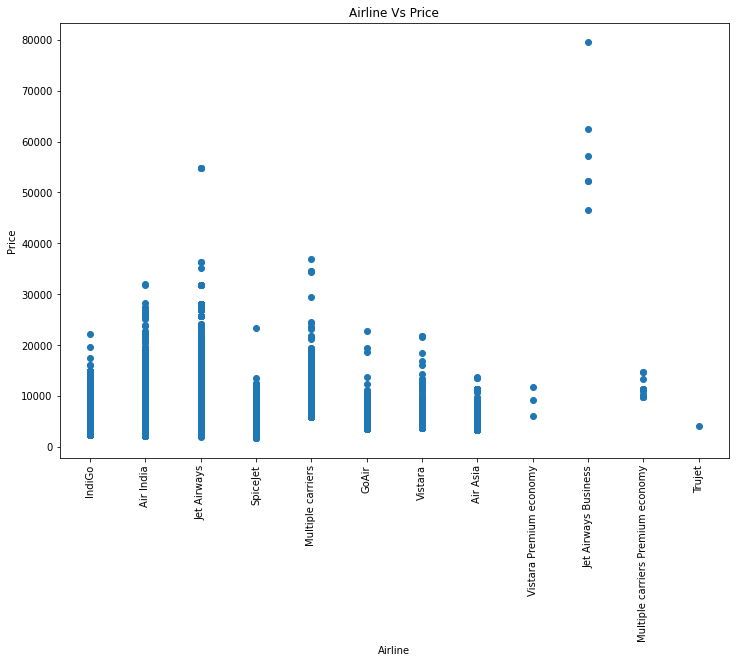

In [156]:
#Lets check which airline is costlier
plt.figure(figsize=(12,8))
plt.scatter(data["Airline"], data["Price"])
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.title("Airline Vs Price")
plt.show()

By looking at the graph above, Jet Airways Business, Air India, Jet Airways, Multiple carriers are costlier comapred to other Airlines.

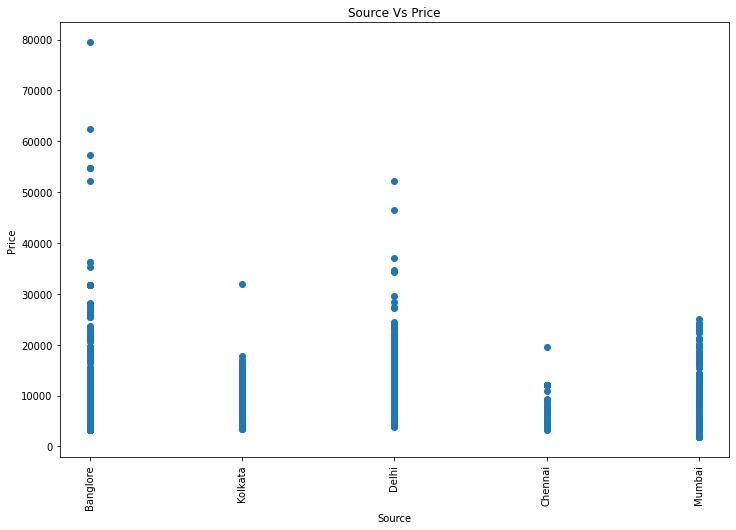

In [157]:
#Lets check from which source region the price is more

plt.figure(figsize=(12,8))
plt.scatter(data["Source"], data["Price"])
plt.xlabel("Source")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.title("Source Vs Price")
plt.show()


The Fights that starts from Bangalore and Delhi are costlier when compares to other cities.

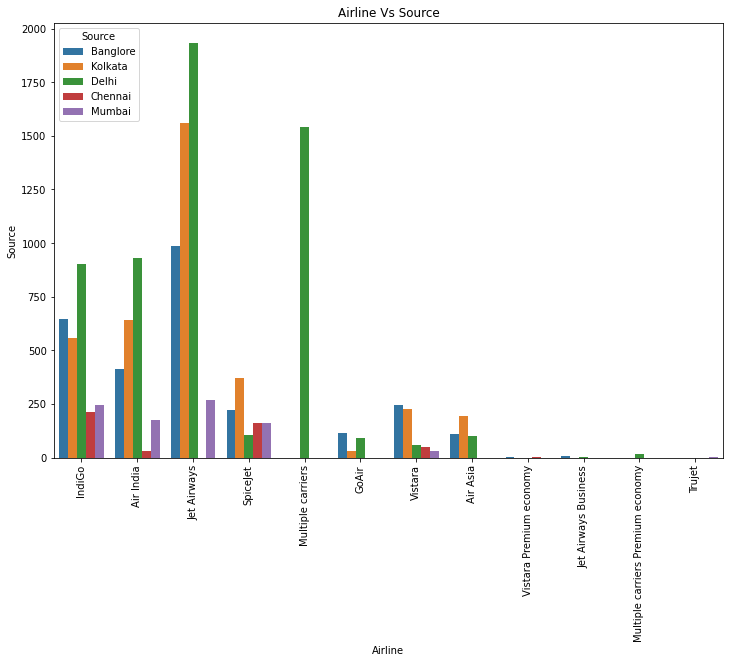

In [160]:
#Lets check the most popular Airline with region

plt.figure(figsize=(12,8))
sns.countplot(x=data["Airline"], hue=data["Source"], data=data)
plt.xlabel("Airline")
plt.ylabel("Source")
plt.title("Airline Vs Source")
plt.xticks(rotation = 90)
plt.show()

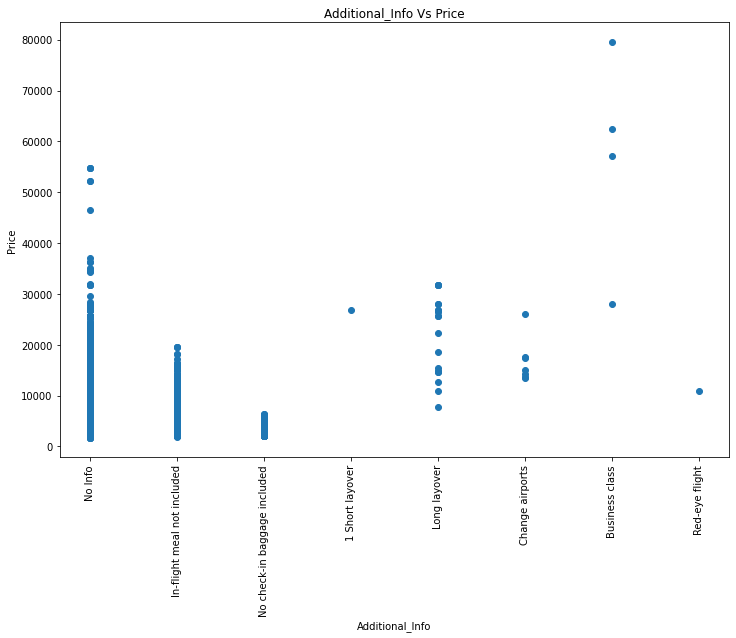

In [163]:
#Lets check if Additional_Info contributes Price distribution.

plt.figure(figsize=(12,8))
plt.scatter(data["Additional_Info"], data["Price"])
plt.xlabel("Additional_Info")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.title("Additional_Info Vs Price")
plt.show()

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


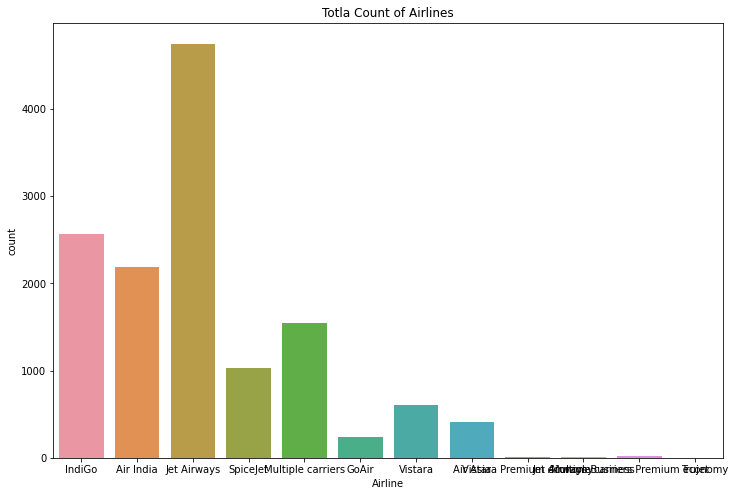

In [164]:
#Lets check the count of Airlines :

plt.figure(figsize=(12,8))
sns.countplot(data["Airline"], data=data)
plt.title("Totla Count of Airlines")
plt.show()

Jet Airways is most popular followed by Indigo and Air India comes next.

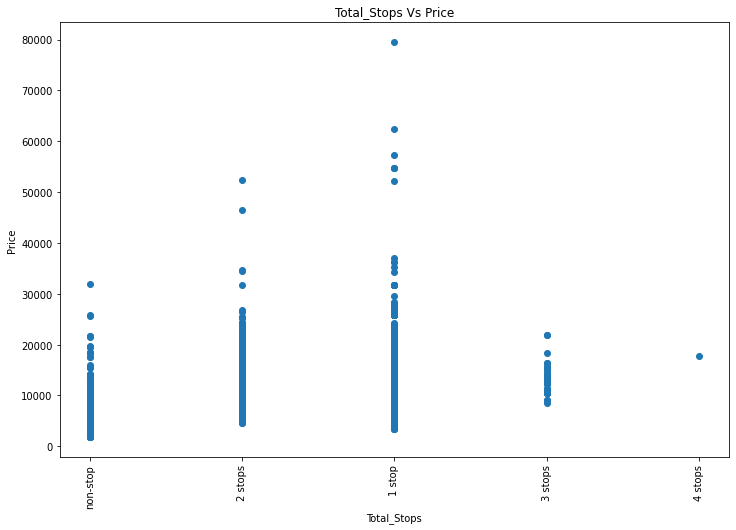

In [172]:
#Lets check Total_Stops vs Price

plt.figure(figsize=(12,8))
plt.scatter(data["Total_Stops"], data["Price"])
plt.xlabel("Total_Stops")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.title("Total_Stops Vs Price")
plt.show()

Price is distributed uniformly. But some cases at 1 stop flight are costlier. that may be due to some occasion.

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


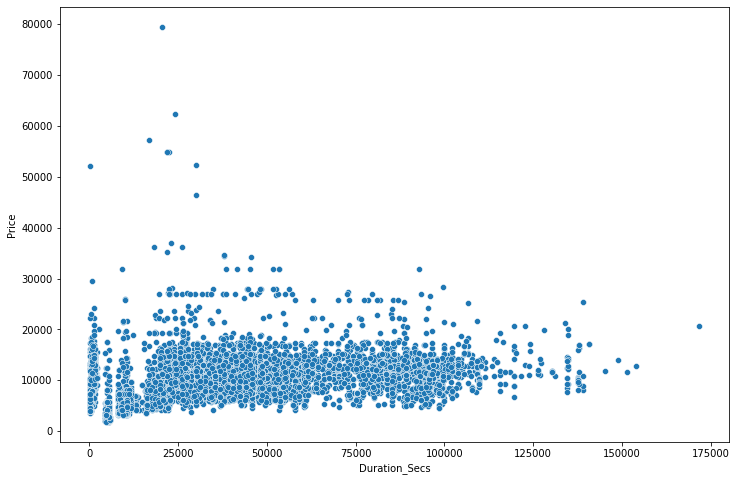

In [169]:
#lets check the relation between Duration_Secs and Price
plt.figure(figsize=(12,8))
sns.scatterplot(data["Duration_Secs"],data["Price"],data=data)
plt.show()

There is no relation between the duration and the Price as such.

###### Encoding : 
    Lets encode all our categorical object type data columns.

In [181]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [182]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Flag,Journey_Day,Journey_Month,Journey_Year,Departure_time,Duration_Secs
0,3.0,0.0,5.0,4.0,5.0,3897.0,1,24,3,2019,1.0,10200
1,1.0,3.0,0.0,1.0,5.0,7662.0,1,5,1,2019,3.0,26700
2,4.0,2.0,1.0,1.0,5.0,13882.0,1,6,9,2019,2.0,1140
3,3.0,3.0,0.0,0.0,5.0,6218.0,1,5,12,2019,0.0,19500
4,3.0,0.0,5.0,0.0,5.0,13302.0,1,3,1,2019,0.0,17100


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353 entries, 0 to 13352
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  float64
 1   Source           13353 non-null  float64
 2   Destination      13353 non-null  float64
 3   Total_Stops      13353 non-null  float64
 4   Additional_Info  13353 non-null  float64
 5   Price            10682 non-null  float64
 6   Flag             13353 non-null  int32  
 7   Journey_Day      13353 non-null  int64  
 8   Journey_Month    13353 non-null  int64  
 9   Journey_Year     13353 non-null  int64  
 10  Departure_time   13353 non-null  float64
 11  Duration_Secs    13353 non-null  int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 1.2 MB


###### Correlation Matrix :
    Lets check the correlation between feature set and target set

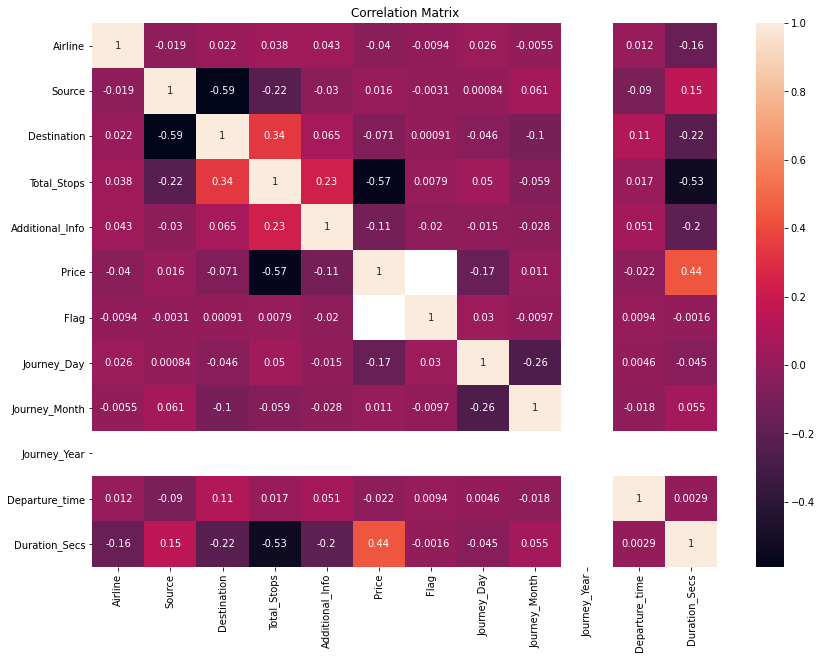

In [186]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

In [189]:
cor_mat=data.corr()
cor_mat["Price"].sort_values(ascending=False)

Price              1.000000
Duration_Secs      0.439086
Source             0.015999
Journey_Month      0.010705
Departure_time    -0.022499
Airline           -0.039565
Destination       -0.071122
Additional_Info   -0.112766
Journey_Day       -0.165448
Total_Stops       -0.571221
Flag                    NaN
Journey_Year            NaN
Name: Price, dtype: float64

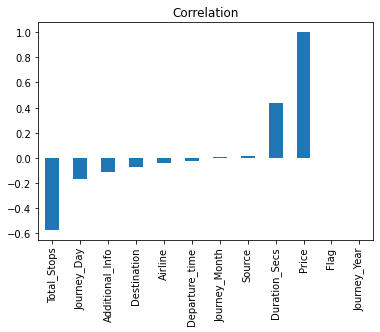

In [190]:
cor_mat["Price"].sort_values(ascending=True).plot(kind='bar')
plt.title("Correlation")
plt.show()

In [191]:
#Lets split our data into train and test as given dataset

flight_train=data[data["Flag"]==1]
flight_test=data[data["Flag"]==0]
flight_train.shape, flight_test.shape

((10682, 12), (2671, 12))

In [ ]:
#Lets drop Flag column from both train and test sets and Price column from test set.
flight_train.drop(["Flag"], axis=1, inplace=True)
flight_test.drop(["Flag"], axis=1, inplace=True)
flight_test.drop(["Price"],axis=1, inplace=True)

In [195]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_time,Duration_Secs
0,3.0,0.0,5.0,4.0,5.0,3897.0,24,3,2019,1.0,10200
1,1.0,3.0,0.0,1.0,5.0,7662.0,5,1,2019,3.0,26700
2,4.0,2.0,1.0,1.0,5.0,13882.0,6,9,2019,2.0,1140
3,3.0,3.0,0.0,0.0,5.0,6218.0,5,12,2019,0.0,19500
4,3.0,0.0,5.0,0.0,5.0,13302.0,3,1,2019,0.0,17100


In [196]:
flight_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Departure_time,Duration_Secs
10682,4.0,2.0,1.0,0.0,5.0,6,6,2019,0.0,39300
10683,3.0,3.0,0.0,0.0,5.0,5,12,2019,2.0,240
10684,4.0,2.0,1.0,0.0,3.0,21,5,2019,1.0,85500
10685,6.0,2.0,1.0,0.0,5.0,21,5,2019,2.0,780
10686,0.0,0.0,2.0,4.0,5.0,24,6,2019,1.0,10200


In [197]:
#Lets split our train data into feature x and target y set
x=flight_train.drop('Price', axis=1)
y=flight_train["Price"]

print(x.shape, y.shape)

(10682, 10) (10682,)


###### Train Test Split:

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

###### StandardScaler :
        Lets scale our data to bring all the datasets to similar scale.

In [199]:
#Scaling Train dataset
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

x_train=SS.fit_transform(x_train)
x_test=SS.transform(x_test)

###### Model Building :

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [209]:
lr=LinearRegression()
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()
svr=SVR()
rd=Ridge()
ls=Lasso()
rfr=RandomForestRegressor()

model=[lr,dtc,knn,svr, rd, ls, rfr]

for m in model:
    m.fit(x_train,y_train)
    y_train_pred=m.predict(x_train)
    y_test_pred=m.predict(x_test)
    acc=r2_score(y_test,y_test_pred)
    print(m)
    print("R2 score on Training set :", r2_score(y_train, y_train_pred))
    print("RMSLE on Training set :", np.sqrt(mean_squared_log_error(y_train, y_train_pred)))
    print("R2 score on Test set :", r2_score(y_test, y_test_pred))
    print("RMSLE on Test set :", np.sqrt(mean_squared_log_error(y_test, y_test_pred)))
    print("\n")

LinearRegression()
R2 score on Training set : 0.3930177485016413
RMSLE on Training set : 0.36193590441836054
R2 score on Test set : 0.4038692068022063
RMSLE on Test set : 0.3595368376784474


DecisionTreeRegressor()
R2 score on Training set : 0.9867035563569135
RMSLE on Training set : 0.046778912634470864
R2 score on Test set : 0.7851578960823581
RMSLE on Test set : 0.18310209733444055


KNeighborsRegressor()
R2 score on Training set : 0.8214781990879361
RMSLE on Training set : 0.18679701881949795
R2 score on Test set : 0.6895507594920524
RMSLE on Test set : 0.23965749574690373


SVR()
R2 score on Training set : 0.04389349627939243
RMSLE on Training set : 0.4882289941764306
R2 score on Test set : 0.03699721619919416
RMSLE on Test set : 0.48443793930228696


Ridge()
R2 score on Training set : 0.3930177430949686
RMSLE on Training set : 0.36193405947658625
R2 score on Test set : 0.40386781366837854
RMSLE on Test set : 0.35953502858627356


Lasso()
R2 score on Training set : 0.393017255363

###### Cross Validation :

In [210]:
from sklearn.model_selection import cross_val_score

model=[lr,dtc,knn,svr, rd, ls, rfr]

#Cross validation with x_train
for m in model:
    cvs=cross_val_score(m,x_train,y_train,cv=4)
    print(cvs )
    print("accuracy of the model", m, "is ",cvs.mean())
    print("\n")

[0.42560755 0.35054128 0.42169674 0.37279653]
accuracy of the model LinearRegression() is  0.3926605267545487


[0.77917245 0.80182513 0.69007063 0.71469862]
accuracy of the model DecisionTreeRegressor() is  0.7464417088182858


[0.74142158 0.65733585 0.72278882 0.60605702]
accuracy of the model KNeighborsRegressor() is  0.6819008163802538


[0.03882917 0.00753669 0.04030531 0.03302723]
accuracy of the model SVR() is  0.029924598613584902


[0.42560991 0.35053687 0.42170177 0.37279582]
accuracy of the model Ridge() is  0.39266109201287464


[0.42561403 0.35054063 0.42168924 0.37279087]
accuracy of the model Lasso() is  0.39265869294678885


[0.87799423 0.84628625 0.84810445 0.78096393]
accuracy of the model RandomForestRegressor() is  0.8383372141724145




In [211]:
#Cross validation with x_test
for m in model:
    cvs=cross_val_score(m,x_test,y_test,cv=4)
    print(cvs )
    print("accuracy of the model", m, "is ",cvs.mean())
    print("\n")

[0.42687276 0.37957657 0.3602254  0.45859288]
accuracy of the model LinearRegression() is  0.4063169007198451


[0.73660354 0.65238352 0.67587148 0.4890367 ]
accuracy of the model DecisionTreeRegressor() is  0.638473809582479


[0.5437531  0.55680177 0.59410696 0.58847918]
accuracy of the model KNeighborsRegressor() is  0.5707852545582015


[-0.0062698  -0.00910761 -0.02496119 -0.00018149]
accuracy of the model SVR() is  -0.010130023424006596


[0.42687877 0.37957269 0.36023983 0.45858869]
accuracy of the model Ridge() is  0.4063199939741351


[0.42689127 0.37961246 0.36021288 0.45854633]
accuracy of the model Lasso() is  0.4063157341132271


[0.78603457 0.741681   0.74696983 0.74381469]
accuracy of the model RandomForestRegressor() is  0.7546250232121896




RandomForestRegressor is performing well, Lets choose rfr as our final model

###### Hyper Parameter Tuning :

In [215]:
from sklearn.model_selection import GridSearchCV

param={'criterion' : ['mse'],
       'random_state' : list(range(0,100)),
       'max_features' : ['auto', 'sqrt', 'log2'],
      }

GCV=GridSearchCV(RandomForestRegressor(n_estimators=200), param, refit=True, cv=4, verbose=2)
GCV.fit(x_train,y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV] END ...criterion=mse, max_features=auto, random_state=0; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=0; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=0; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=0; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=1; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=1; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=1; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=1; total time=   1.9s
[CV] END ...criterion=mse, max_features=auto, random_state=2; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=2; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto, random_state=2; total time=   1.8s
[CV] END ...criterion=mse, max_features=auto,

[CV] END ..criterion=mse, max_features=auto, random_state=25; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=25; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=25; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=26; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=26; total time=   1.8s
[CV] END ..criterion=mse, max_features=auto, random_state=26; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=26; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=27; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=27; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=27; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=27; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=28; total time=   1.8s
[CV] END ..criterion=mse, ma

[CV] END ..criterion=mse, max_features=auto, random_state=50; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=51; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=51; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=51; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=51; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=52; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=52; total time=   2.0s
[CV] END ..criterion=mse, max_features=auto, random_state=52; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=52; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=53; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=53; total time=   1.8s
[CV] END ..criterion=mse, max_features=auto, random_state=53; total time=   1.9s
[CV] END ..criterion=mse, ma

[CV] END ..criterion=mse, max_features=auto, random_state=76; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=76; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=76; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=77; total time=   2.0s
[CV] END ..criterion=mse, max_features=auto, random_state=77; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=77; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=77; total time=   2.0s
[CV] END ..criterion=mse, max_features=auto, random_state=78; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=78; total time=   2.0s
[CV] END ..criterion=mse, max_features=auto, random_state=78; total time=   2.0s
[CV] END ..criterion=mse, max_features=auto, random_state=78; total time=   1.9s
[CV] END ..criterion=mse, max_features=auto, random_state=79; total time=   1.9s
[CV] END ..criterion=mse, ma

[CV] END ...criterion=mse, max_features=sqrt, random_state=1; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=2; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=2; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=2; total time=   1.1s
[CV] END ...criterion=mse, max_features=sqrt, random_state=2; total time=   1.1s
[CV] END ...criterion=mse, max_features=sqrt, random_state=3; total time=   1.1s
[CV] END ...criterion=mse, max_features=sqrt, random_state=3; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=3; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=3; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=4; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=4; total time=   1.0s
[CV] END ...criterion=mse, max_features=sqrt, random_state=4; total time=   1.0s
[CV] END ...criterion=mse, m

[CV] END ..criterion=mse, max_features=sqrt, random_state=27; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=27; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=27; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=28; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=28; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=28; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=28; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=29; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=29; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=29; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=29; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=30; total time=   1.1s
[CV] END ..criterion=mse, ma

[CV] END ..criterion=mse, max_features=sqrt, random_state=52; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=53; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=53; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=53; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=53; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=54; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=54; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=54; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=54; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=55; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=55; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=55; total time=   1.1s
[CV] END ..criterion=mse, ma

[CV] END ..criterion=mse, max_features=sqrt, random_state=78; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=78; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=78; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=79; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=79; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=79; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=79; total time=   1.0s
[CV] END ..criterion=mse, max_features=sqrt, random_state=80; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=80; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=80; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=80; total time=   1.1s
[CV] END ..criterion=mse, max_features=sqrt, random_state=81; total time=   1.1s
[CV] END ..criterion=mse, ma

[CV] END ...criterion=mse, max_features=log2, random_state=3; total time=   1.1s
[CV] END ...criterion=mse, max_features=log2, random_state=4; total time=   1.1s
[CV] END ...criterion=mse, max_features=log2, random_state=4; total time=   1.0s
[CV] END ...criterion=mse, max_features=log2, random_state=4; total time=   1.0s
[CV] END ...criterion=mse, max_features=log2, random_state=4; total time=   1.1s
[CV] END ...criterion=mse, max_features=log2, random_state=5; total time=   1.1s
[CV] END ...criterion=mse, max_features=log2, random_state=5; total time=   1.0s
[CV] END ...criterion=mse, max_features=log2, random_state=5; total time=   1.0s
[CV] END ...criterion=mse, max_features=log2, random_state=5; total time=   1.0s
[CV] END ...criterion=mse, max_features=log2, random_state=6; total time=   1.0s
[CV] END ...criterion=mse, max_features=log2, random_state=6; total time=   1.0s
[CV] END ...criterion=mse, max_features=log2, random_state=6; total time=   1.0s
[CV] END ...criterion=mse, m

[CV] END ..criterion=mse, max_features=log2, random_state=29; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=29; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=29; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=30; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=30; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=30; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=30; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=31; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=31; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=31; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=31; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=32; total time=   1.0s
[CV] END ..criterion=mse, ma

[CV] END ..criterion=mse, max_features=log2, random_state=54; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=55; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=55; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=55; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=55; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=56; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=56; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=56; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=56; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=57; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=57; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=57; total time=   1.0s
[CV] END ..criterion=mse, ma

[CV] END ..criterion=mse, max_features=log2, random_state=80; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=80; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=80; total time=   1.0s
[CV] END ..criterion=mse, max_features=log2, random_state=81; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=81; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=81; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=81; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=82; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=82; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=82; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=82; total time=   1.1s
[CV] END ..criterion=mse, max_features=log2, random_state=83; total time=   1.1s
[CV] END ..criterion=mse, ma

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_estimators=200),
             param_grid={'criterion': ['mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             verbose=2)

In [216]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'criterion': 'mse', 'max_features': 'auto', 'random_state': 41}
Best Estimator :  RandomForestRegressor(n_estimators=200, random_state=41)


In [219]:
GCV_pred=GCV.predict(x_test)

print("RMSLE on test set of Train Set :", np.sqrt(mean_squared_log_error(y_test, GCV_pred)))
print("Accuracy Score :",r2_score(y_test,GCV_pred))

RMSLE on test set of Train Set : 0.14583713074357274
Accuracy Score : 0.8646354737152255


Applying test set to the model, we have got 86.46% of accuracy score. Lets save this model.

###### Saving the best Model : 

In [221]:
import joblib
file_name="Flight_Price_Prediction.obj"
joblib.dump(rfr,open(file_name,'wb'))

###### Using the Test Dataset:

In [222]:
#Load the Model
fitted_model=joblib.load(open('Flight_Price_Prediction.obj', 'rb'))

In [223]:
fitted_model

RandomForestRegressor()

In [224]:
#Prediction over test data
predictions =fitted_model.predict(flight_test)

In [225]:
predictions

array([ 9742.65,  9786.77,  9786.77, ...,  9786.77, 12202.76,  9786.77])

In [226]:
#storing predictions as dataFrame
flightPrice_pred=pd.DataFrame(predictions,columns=["Price"])

In [227]:
flightPrice_pred.head()

,Price
0,9742.650000
1,9786.770000
2,9786.770000
3,9786.770000
4,8038.836667


In [228]:
#Storing results as csv
flightPrice_pred.to_csv("Flight_Price_Prediction.csv",index=False)